## assignment 2

Data: Use data from “Public school Data.zip” to answer questions Q2, Q3 and Q4  
through Visuals + Contexts

Q4. Plot the distribution of Schools’ FT_TEACHER over states and indicate which highest, lowest of High and Elementary schools. 

In [6]:
from   zipfile  import  ZipFile  as  zf 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd

with  zf('data/Public_Schools.zip','r')  as  fp: 
    fp.extractall('data')

schools = gpd.read_file('data/Public_Schools/PublicSchools.shp')

schools.head()

# Keep only needed columns
schools_filtered = schools[['STATE','LEVEL_','FT_TEACHER', 'geometry', 'ENROLLMENT']]

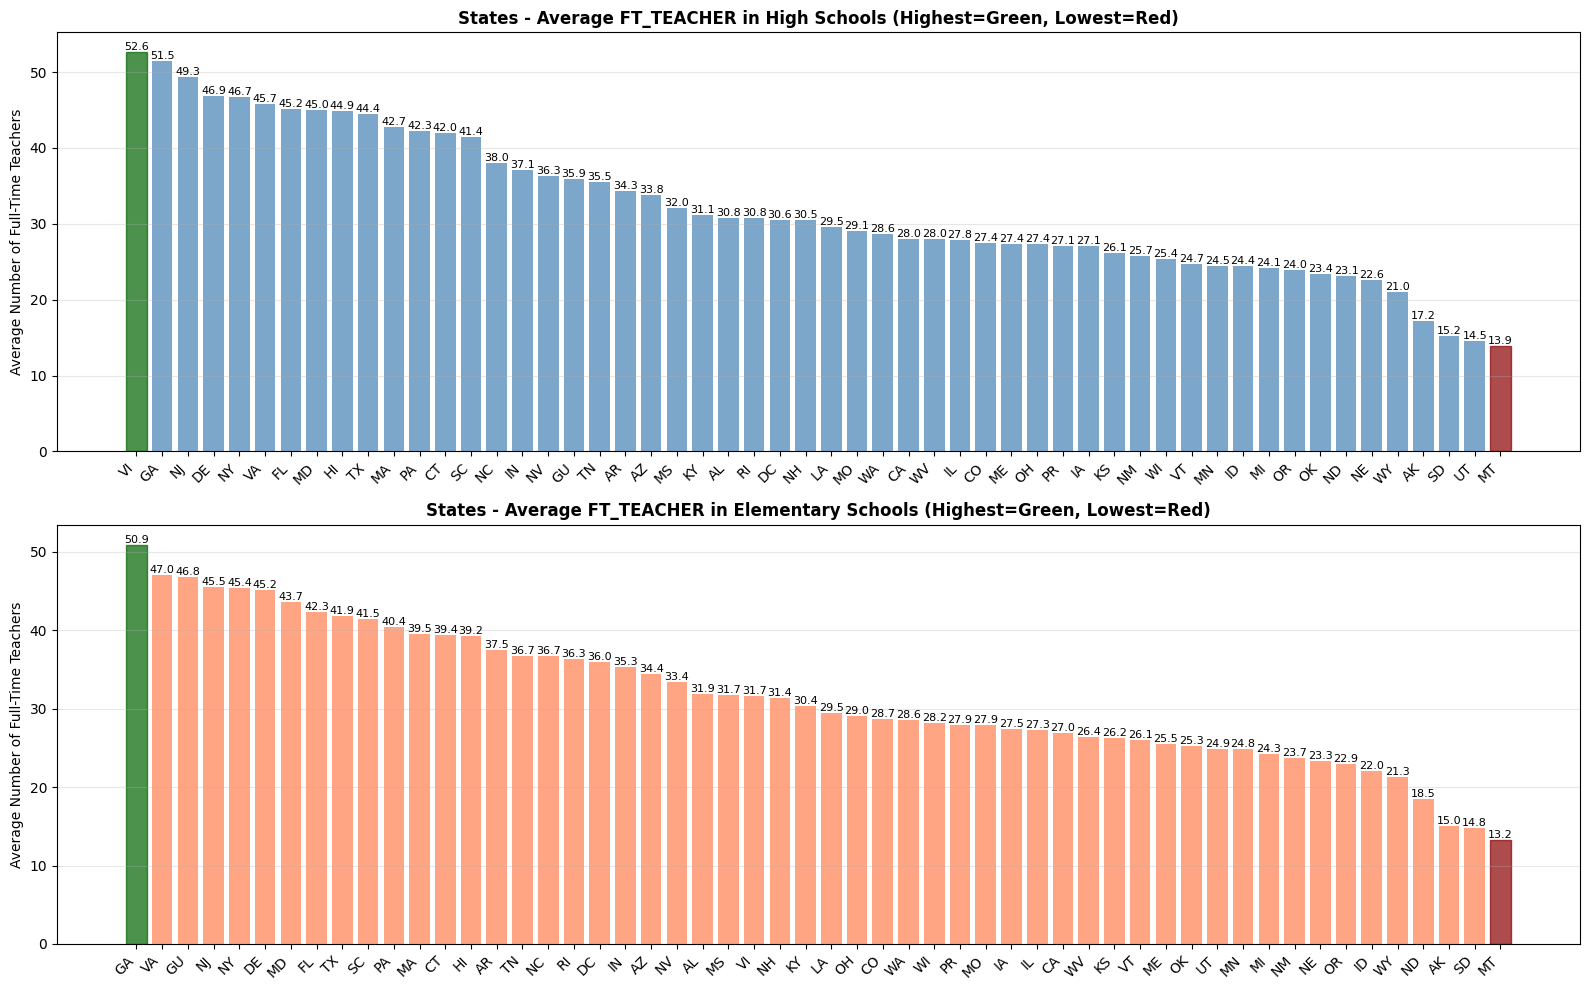

In [7]:


# Filter for High and Elementary schools
schools_filtered = schools_filtered[schools_filtered['LEVEL_'].isin(['HIGH', 'ELEMENTARY'])]

# Remove invalid FT_TEACHER values (-999 = missing data)
schools_filtered = schools_filtered[schools_filtered['FT_TEACHER'] > 0]

# Separate data by school level
high_schools = schools_filtered[schools_filtered['LEVEL_'] == 'HIGH']
elementary_schools = schools_filtered[schools_filtered['LEVEL_'] == 'ELEMENTARY']

# Calculate summary statistics per state
high_stats = high_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()
elem_stats = elementary_schools.groupby('STATE')['FT_TEACHER'].agg(['mean', 'median', 'sum', 'count']).reset_index()

# Create visualization - states by average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

# Sort by mean FT_TEACHER  head() can be used to limit to top 20 if needed
high_stats_sorted = high_stats.sort_values('mean', ascending=False)
elem_stats_sorted = elem_stats.sort_values('mean', ascending=False)

# Plot High Schools
x_pos = np.arange(len(high_stats_sorted))
bars1 = ax1.bar(x_pos, high_stats_sorted['mean'], color='steelblue', alpha=0.7)

# Highlight highest and lowest
bars1[0].set_color('darkgreen')
bars1[-1].set_color('darkred')

ax1.set_xticks(x_pos)
ax1.set_xticklabels(high_stats_sorted['STATE'], rotation=45, ha='right')
ax1.set_ylabel('Average Number of Full-Time Teachers')
ax1.set_title('States - Average FT_TEACHER in High Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(high_stats_sorted.iterrows()):
    ax1.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

# Plot Elementary Schools
x_pos2 = np.arange(len(elem_stats_sorted))
bars2 = ax2.bar(x_pos2, elem_stats_sorted['mean'], color='coral', alpha=0.7)
# Highlight highest and lowest
bars2[0].set_color('darkgreen')
bars2[-1].set_color('darkred')

ax2.set_xticks(x_pos2)
ax2.set_xticklabels(elem_stats_sorted['STATE'], rotation=45, ha='right')
ax2.set_ylabel('Average Number of Full-Time Teachers')
ax2.set_title('States - Average FT_TEACHER in Elementary Schools (Highest=Green, Lowest=Red)', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(elem_stats_sorted.iterrows()):
    ax2.text(i, row['mean'], f"{row['mean']:.1f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

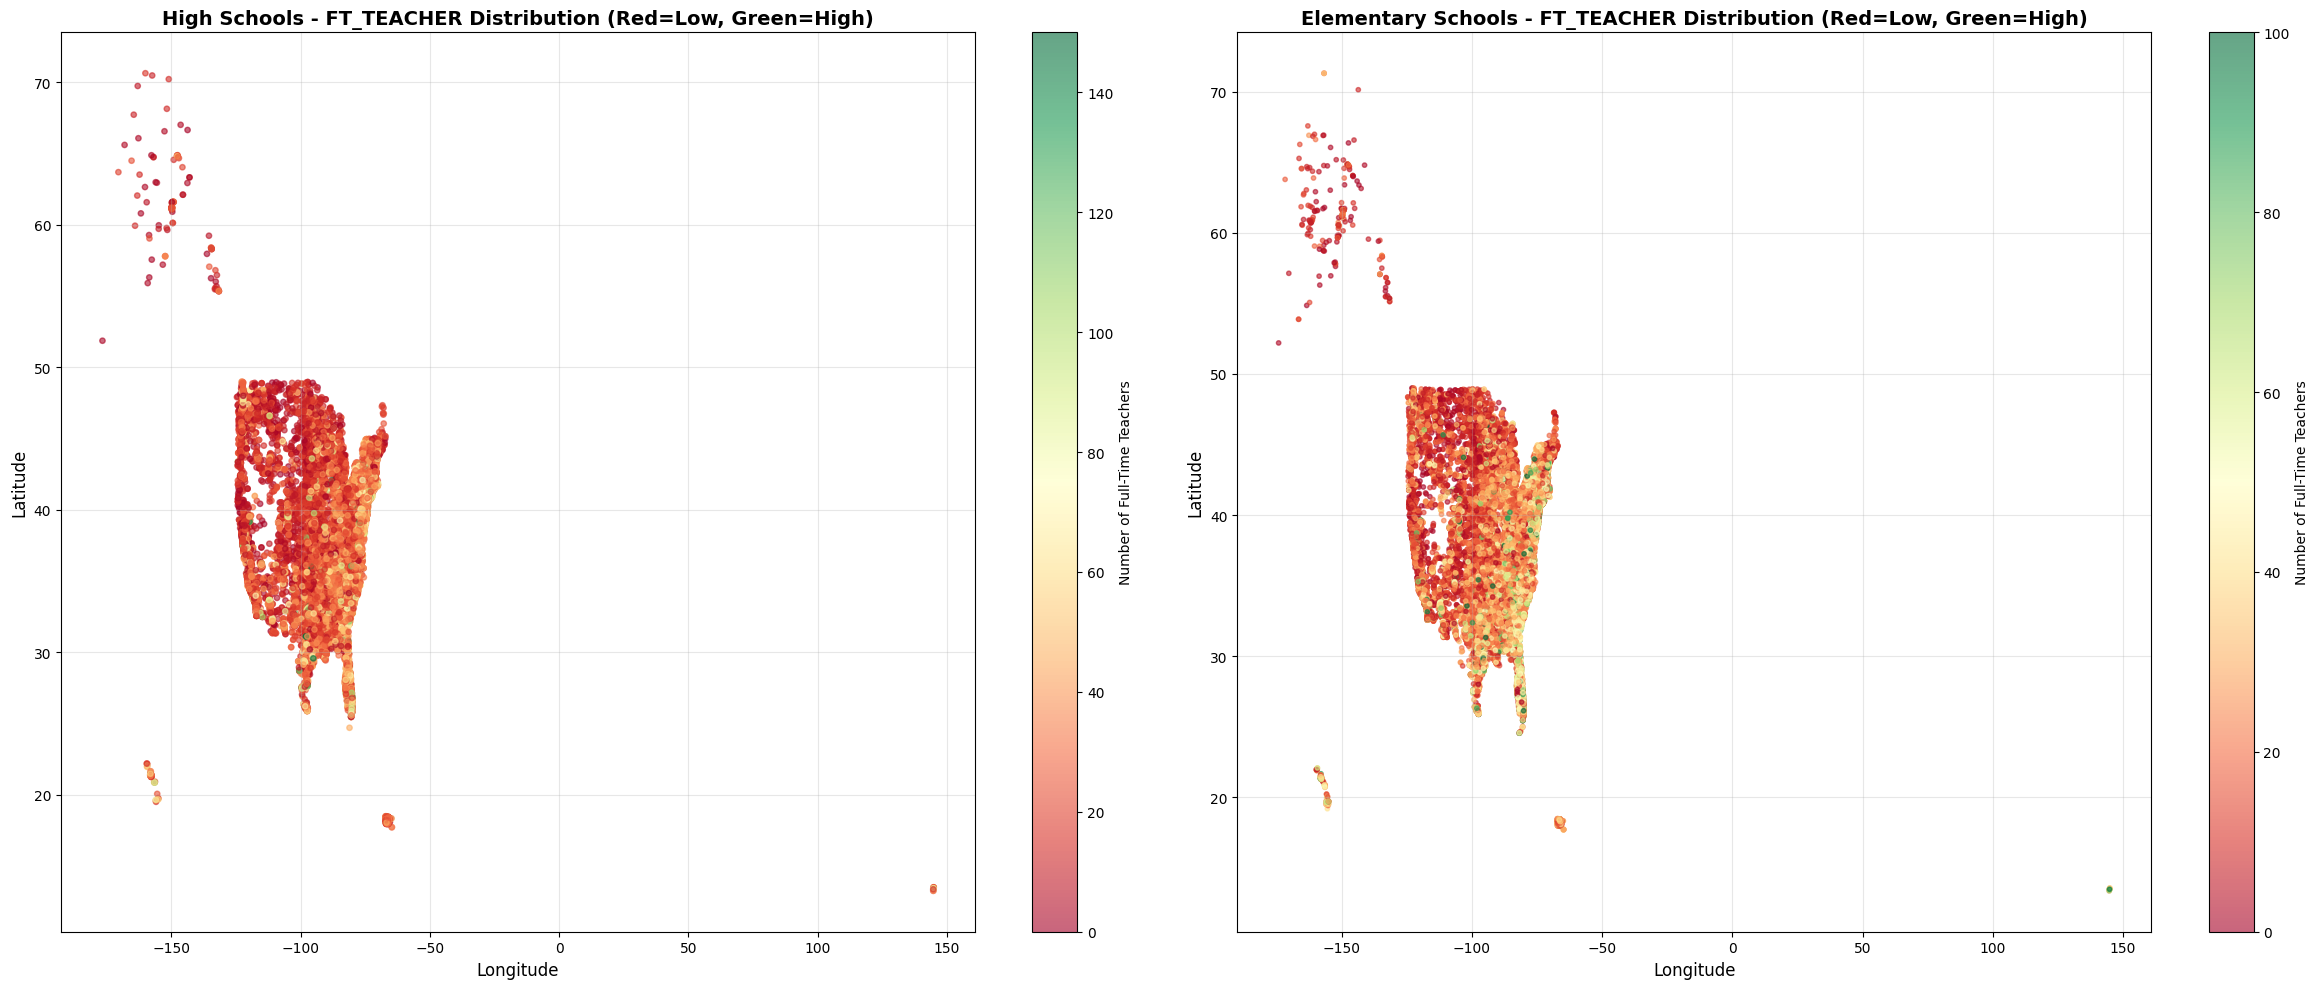


Mapped 20721 high schools and 47329 elementary schools
Color coding: Red = fewer teachers, Yellow = average, Green = more teachers


In [9]:
# Extract coordinates
schools_filtered['longitude'] = schools_filtered.geometry.x
schools_filtered['latitude'] = schools_filtered.geometry.y


# Create figure with 2 maps (High and Elementary schools)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))

# Plot HIGH SCHOOLS with color based on FT_TEACHER count
high_schools_map = schools_filtered[schools_filtered['LEVEL_'] == 'HIGH'].copy()
scatter1 = ax1.scatter(high_schools_map['longitude'], high_schools_map['latitude'], 
                       c=high_schools_map['FT_TEACHER'], cmap='RdYlGn', 
                       alpha=0.6, s=15, vmin=0, vmax=150)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_title('High Schools - FT_TEACHER Distribution (Red=Low, Green=High)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Number of Full-Time Teachers', fontsize=10)

# Plot ELEMENTARY SCHOOLS with color based on FT_TEACHER count
elem_schools_map = schools_filtered[schools_filtered['LEVEL_'] == 'ELEMENTARY'].copy()
scatter2 = ax2.scatter(elem_schools_map['longitude'], elem_schools_map['latitude'], 
                       c=elem_schools_map['FT_TEACHER'], cmap='RdYlGn', 
                       alpha=0.6, s=10, vmin=0, vmax=100)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)
ax2.set_title('Elementary Schools - FT_TEACHER Distribution (Red=Low, Green=High)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Number of Full-Time Teachers', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nMapped {len(high_schools_map)} high schools and {len(elem_schools_map)} elementary schools")
print("Color coding: Red = fewer teachers, Yellow = average, Green = more teachers")

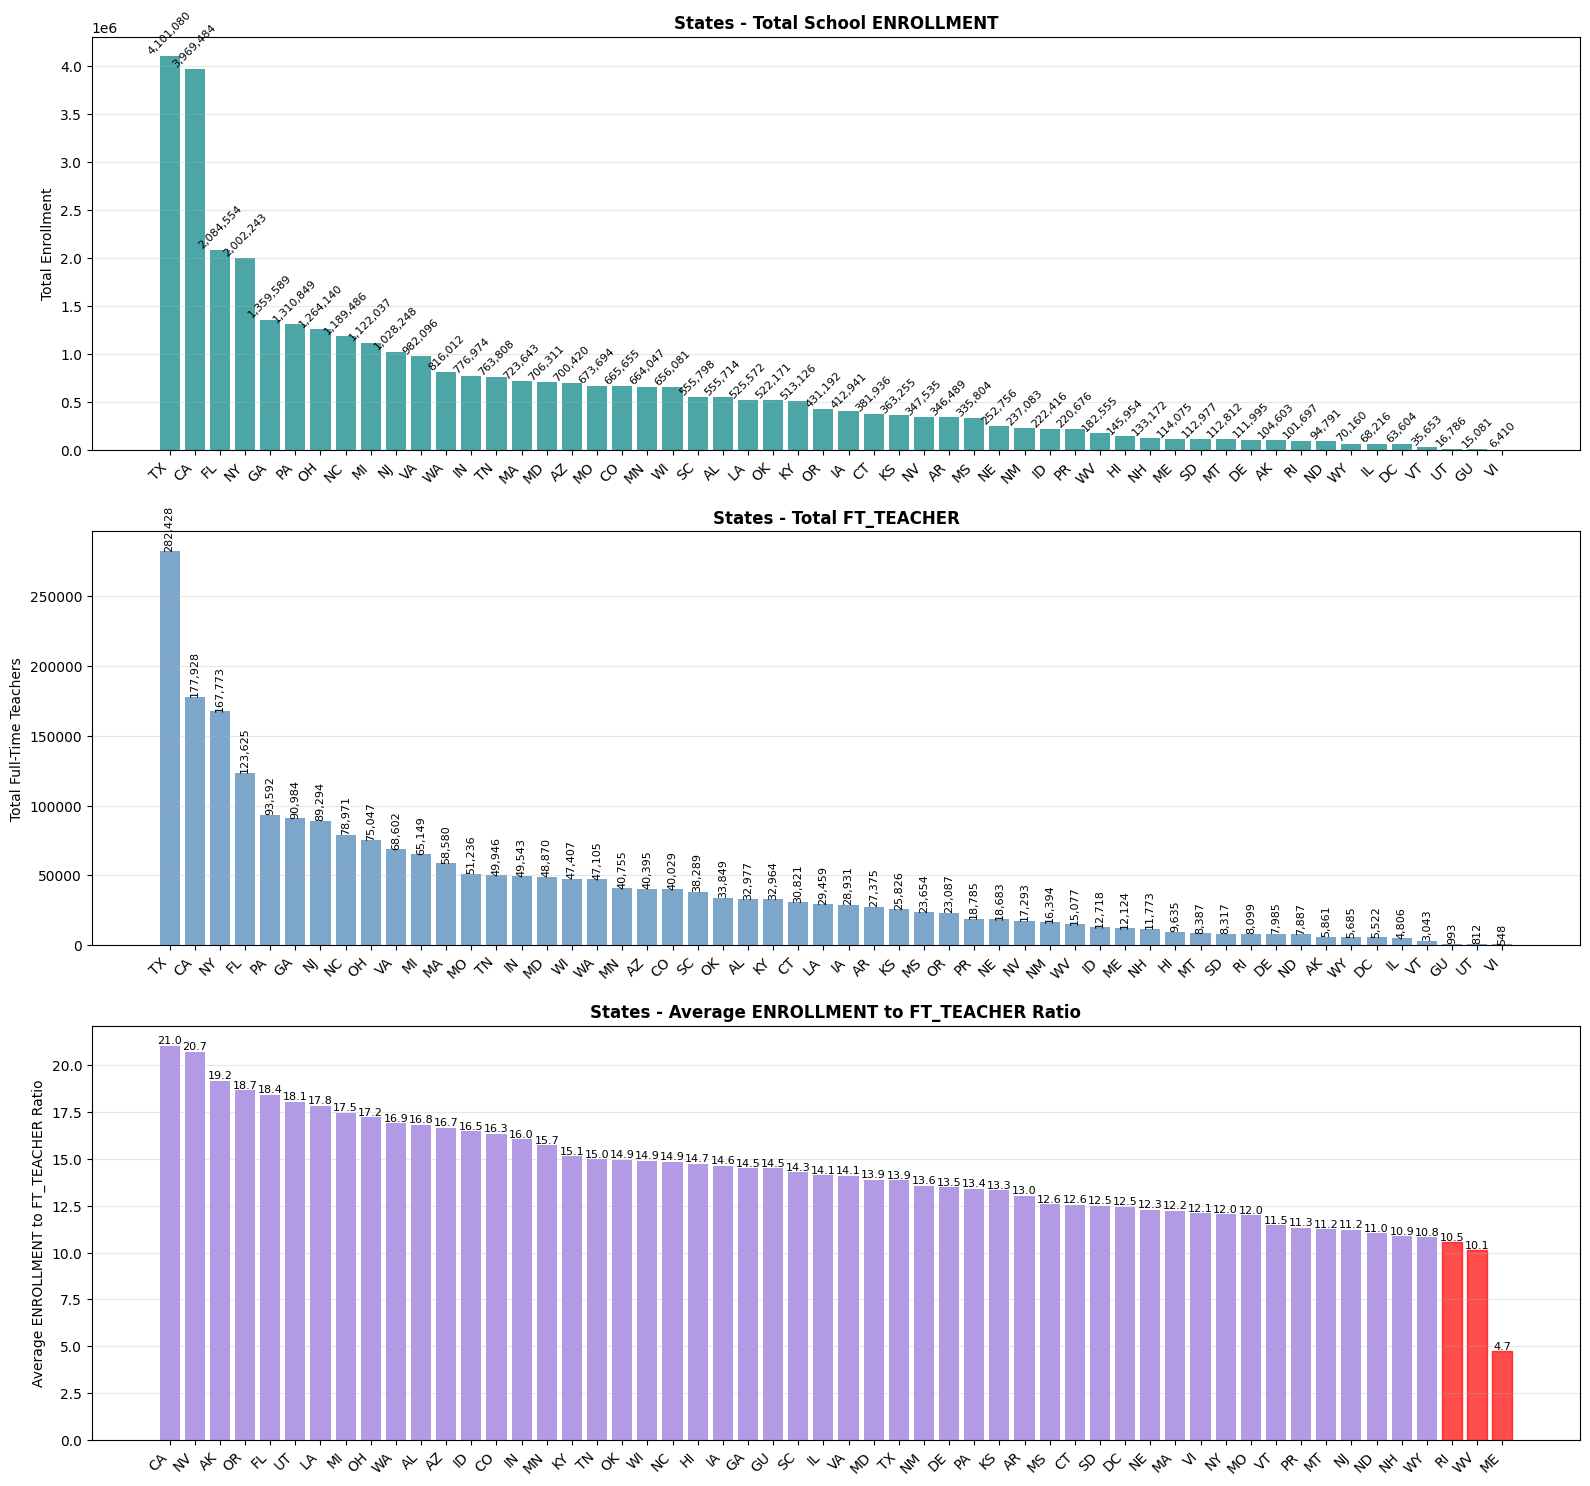


THREE STATES WITH LOWEST ENROLLMENT TO FT_TEACHER RATIO
ME: 4.74 students per teacher
WV: 10.14 students per teacher
RI: 10.54 students per teacher


In [19]:
""" Q5. Plot the distribution of Schools' ENROLLMENT and compare it with q4.  Indicate those three regions which have lowest ENROLLMENT to 
FT_TEACHER ratio. """


# plot the distribution of Schools' ENROLLMENT over states and enrollment to teacher ratio

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 15))

# 1. Plot the distribution of Schools' ENROLLMENT over states
enrollment_by_state = schools_filtered.groupby('STATE')['ENROLLMENT'].sum().reset_index()
enrollment_by_state = enrollment_by_state.sort_values('ENROLLMENT', ascending=False)

x_pos1 = np.arange(len(enrollment_by_state))
bars1 = ax1.bar(x_pos1, enrollment_by_state['ENROLLMENT'], color='teal', alpha=0.7)
ax1.set_xticks(x_pos1)
ax1.set_xticklabels(enrollment_by_state['STATE'], rotation=45, ha='right')
ax1.set_ylabel('Total Enrollment')
ax1.set_title('States - Total School ENROLLMENT', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(enrollment_by_state.iterrows()):
   ax1.text(i, row['ENROLLMENT'], f"{row['ENROLLMENT']:,.0f}", ha='center', va='bottom', fontsize=8, rotation=45)

# 2. Plot the distribution of Schools' FT_TEACHER over states
teachers_by_state = schools_filtered.groupby('STATE')['FT_TEACHER'].sum().reset_index()
teachers_by_state = teachers_by_state.sort_values('FT_TEACHER', ascending=False)

x_pos2 = np.arange(len(teachers_by_state))
bars2 = ax2.bar(x_pos2, teachers_by_state['FT_TEACHER'], color='steelblue', alpha=0.7)
ax2.set_xticks(x_pos2)
ax2.set_xticklabels(teachers_by_state['STATE'], rotation=45, ha='right')
ax2.set_ylabel('Total Full-Time Teachers')
ax2.set_title('States - Total FT_TEACHER', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(teachers_by_state.iterrows()):
   ax2.text(i, row['FT_TEACHER'], f"{row['FT_TEACHER']:,.0f}", ha='center', va='bottom', fontsize=8, rotation=90)

# 3. Calculate and plot ENROLLMENT to FT_TEACHER ratio
schools_filtered['ENROLLMENT_FT_TEACHER_RATIO'] = schools_filtered['ENROLLMENT'] / schools_filtered['FT_TEACHER']
ratio_by_state = schools_filtered.groupby('STATE')['ENROLLMENT_FT_TEACHER_RATIO'].mean().reset_index()
ratio_by_state = ratio_by_state.sort_values('ENROLLMENT_FT_TEACHER_RATIO', ascending=False)

x_pos3 = np.arange(len(ratio_by_state))
bars3 = ax3.bar(x_pos3, ratio_by_state['ENROLLMENT_FT_TEACHER_RATIO'], color='mediumpurple', alpha=0.7)
ax3.set_xticks(x_pos3)
ax3.set_xticklabels(ratio_by_state['STATE'], rotation=45, ha='right')
ax3.set_ylabel('Average ENROLLMENT to FT_TEACHER Ratio')
ax3.set_title('States - Average ENROLLMENT to FT_TEACHER Ratio', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (idx, row) in enumerate(ratio_by_state.iterrows()):
   ax3.text(i, row['ENROLLMENT_FT_TEACHER_RATIO'], f"{row['ENROLLMENT_FT_TEACHER_RATIO']:.1f}", ha='center', va='bottom', fontsize=8)


# Highlight The the three regions which have lowest ENROLLMENT to FT_TEACHER ratio
bars3[-1].set_color('red')
bars3[-2].set_color('red')
bars3[-3].set_color('red')


plt.tight_layout()
plt.show()

# Identify three states with lowest ENROLLMENT to FT_TEACHER ratio
lowest_three = ratio_by_state.nsmallest(3, 'ENROLLMENT_FT_TEACHER_RATIO')
print("\n" + "="*70)
print("THREE STATES WITH LOWEST ENROLLMENT TO FT_TEACHER RATIO")
print("="*70)
for idx, row in lowest_three.iterrows():
    print(f"{row['STATE']}: {row['ENROLLMENT_FT_TEACHER_RATIO']:.2f} students per teacher")
